# Analytical Benchmarks - 1D Spherical 

In [1]:
#import and initialisation
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
init_printing()
%matplotlib inline

In [2]:
#define the symbols used in the derivation
r,rho,C1,Cr,gr,mu,tau,rho0,r0= symbols( 'r  rho C1 C_r g_r mu tau rho_0 r_0')
vr = symbols('v_r',function=True)
p = symbols('p',function=True)

Firstly, we define the continuity (mass conservation) equation and the momentum equation in 1D, as well as the 1D stress tensor ($\tau$):

In [3]:
def get_continuity_equation(vr,rho):
    return r**-2*Derivative(r**2*rho*vr,r)

In [4]:
def get_tau_rr():
    return -mu*(2*Derivative(vr,r) - Rational(2,3)*r**-2*Derivative(r**2*vr,r))

In [5]:
def get_tau_thetatheta():
    return -mu*(2*vr/r-Rational(2,3)*r**-2*Derivative(r**2*vr,r))

In [6]:
def get_tau_phiphi():
    return get_tau_thetatheta()

In [7]:
def get_momentum_equation(p):
    return -Derivative(p,r) + rho*gr - ( r**-2*Derivative(r**2*tau_rr,r) - (tau_thetatheta + tau_phiphi)/r)

Next we prescibe the density profile, and then get the continuity equation:

In [8]:
rho=rho0*(1-r/r0)
rho

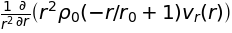

In [9]:
continuity_equation = get_continuity_equation(vr(r),rho)
continuity_equation

(Note that equations in Sympy are implicitly equal to zero)

Then, we solve the continuity equation for the velocity:

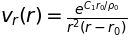

In [10]:
velocity_equation = dsolve(r**2*continuity_equation)
velocity_equation

Now assign this equation to a new value for $v_x$, and replace the constant $e^{\frac{C_1r_0}{\rho_0}}$ with the more informative $C_r$:

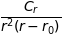

In [11]:
velocity_equation = velocity_equation.subs(exp(C1*r0/rho0),Cr)
vr = velocity_equation.rhs
vr

In [12]:
get_continuity_equation(vr,rho).doit().simplify()

Next, we obtain the stress tensor $\tau$:

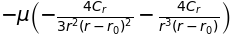

In [13]:
tau_rr=get_tau_rr()
tau_rr.doit()

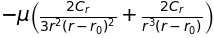

In [14]:
tau_thetatheta = get_tau_thetatheta()
tau_thetatheta.doit()

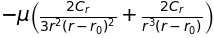

In [15]:
tau_phiphi = get_tau_phiphi()
tau_phiphi.doit()

Then, we obtain the momentum equation:

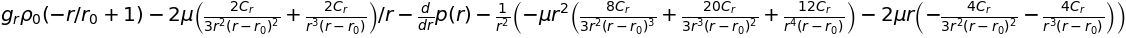

In [16]:
momentum_equation = get_momentum_equation(p(r)).doit()
momentum_equation

Next, we solve this differential equation to give us an equation for the pressure:

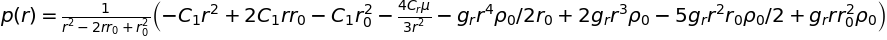

In [17]:
pressure_equation = dsolve(momentum_equation)
pressure_equation

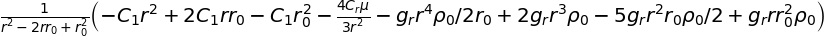

In [18]:
p = pressure_equation.rhs
p

We then perform two "sanity checks": we substitute the obtained equations into the continuity and momentum equations, which should then return zero:

In [19]:
get_momentum_equation(p).doit().simplify()

In [20]:
get_continuity_equation(vr,rho).doit().simplify()

This gives us the following final equations for the velocity and pressure:

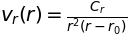

In [21]:
velocity_equation

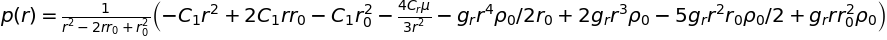

In [22]:
pressure_equation

Finally, we calculate the strain rates:

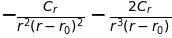

In [23]:
e_rr = Derivative(vr,r).doit()
e_rr

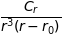

In [24]:
e_thetatheta = vr/r
e_thetatheta

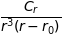

In [25]:
e_phiphi = vr/r
e_phiphi

# Plotting

Firstly, we need to generate functions from the above expressions for density, velocity and pressure:

In [26]:
density_function = lambdify(r,rho.subs(rho0,1).subs(r0,1))

In [27]:
velocity_function = lambdify(r,vr.subs(Cr,1).subs(rho0,1).subs(r0,1))

In [28]:
pressure_function = lambdify(r,p.subs(C1,0).subs(Cr,1).subs(gr,1).subs(mu,1).subs(rho0,1).subs(r0,1))

In [29]:
e_rr_function = lambdify(r,e_rr.subs(Cr,1).subs(r0,1))

In [30]:
e_phiphi_function = lambdify(r,e_phiphi.subs(Cr,1).subs(r0,1))

Now we need an x range to plot over:


In [31]:
r_plotting = np.arange(2,3,0.01)

Finally, we plot the density, velocity and pressure profiles:

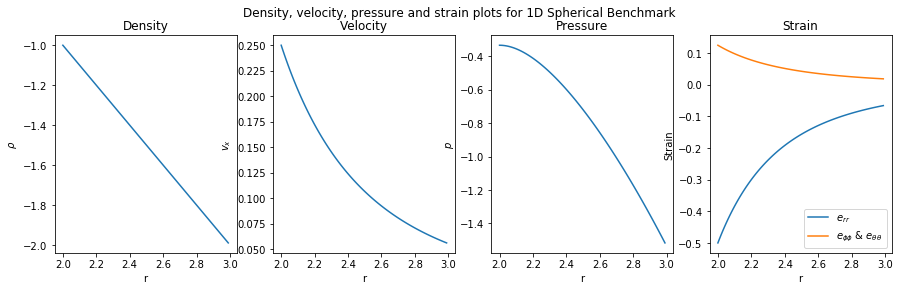

In [32]:
fig,axes = plt.subplots(1,4,figsize=(15,4))

axes[0].plot(r_plotting,density_function(r_plotting))
axes[0].set_xlabel("r")
axes[0].set_ylabel(r"$\rho$")
axes[0].set_title("Density")

axes[1].plot(r_plotting,velocity_function(r_plotting))
axes[1].set_xlabel("r")
axes[1].set_ylabel("$v_x$")
axes[1].set_title("Velocity")

axes[2].plot(r_plotting,pressure_function(r_plotting))
axes[2].set_xlabel("r")
axes[2].set_ylabel("$p$")
axes[2].set_title("Pressure")

axes[3].plot(r_plotting,e_rr_function(r_plotting),label=r"$e_{rr}$")
axes[3].plot(r_plotting,e_phiphi_function(r_plotting),label=r"$e_{\phi \phi}$ & $e_{\theta \theta}$")
axes[3].set_xlabel("r")
axes[3].set_ylabel("Strain")
axes[3].set_title("Strain")
axes[3].legend()

fig.suptitle("Density, velocity, pressure and strain plots for 1D Spherical Benchmark")

In [33]:
fig.savefig("1DSpherical.pdf")